Data Preprocessing:


In [56]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
cars = pd.read_excel(r'DS1_C4_S9_Car_Data.xlsx')
for col in cars:
    if cars[col].isnull().any() and col not in['Kerb_Weight','Gross_Vehicle_Weight']: 
        if cars[col].dtype == 'object':
            cars[col].fillna("Not Available",inplace=True)
        elif cars[col].dtype == 'float64':
            cars[col].fillna(cars[col].mean(),inplace=True)
    
cars.info()

# Interpretation
# By using for loop the missing values are filled by mean and mode respective of there data types and by cars.info() we can see all values are filled exculding kerb and gross whicle weight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S. No.                          1276 non-null   int64  
 1   Make                            1276 non-null   object 
 2   Model                           1276 non-null   object 
 3   Variant                         1276 non-null   object 
 4   Displacement                    1276 non-null   float64
 5   Cylinders                       1276 non-null   float64
 6   Valves_Per_Cylinder             1276 non-null   float64
 7   Fuel_Tank_Capacity_litre        1276 non-null   float64
 8   Fuel_Type                       1276 non-null   object 
 9   Height_mm                       1276 non-null   float64
 10  Length_mm                       1276 non-null   float64
 11  Width_mm                        1276 non-null   float64
 12  Body_Type                       12

Market Segmentation Analysis:

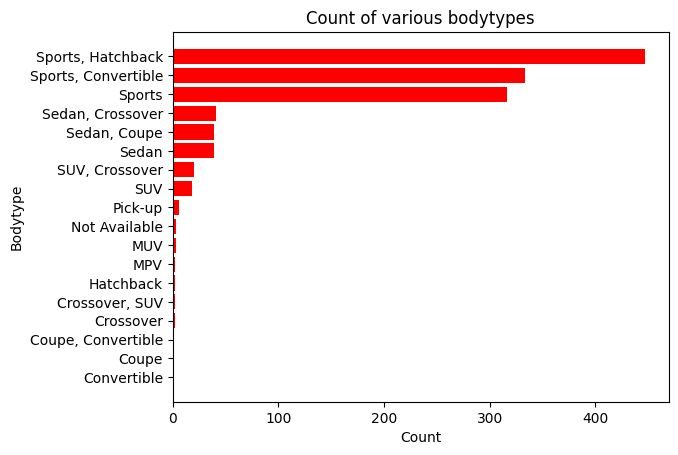

In [78]:
# Task1:
val = cars.groupby(['Body_Type'])['Body_Type'].count().sort_values(ascending=True).values
ind = cars.groupby(['Body_Type'])['Body_Type'].count().index
import matplotlib.pyplot as plt
plt.barh(ind,val,color = 'red')
plt.title('Count of various bodytypes')
plt.xlabel('Count')
plt.ylabel('Bodytype')
plt.show()

# Interpretation
# The top 5 body types are HATCHA=BACK,CONVERTIBLE,SPORTS,CROSSOVER,COUPE which can be prefered bodytype for new car 

In [87]:
# Task2:
df3 = cars.loc[:,['Make','Body_Type', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Kerb_Weight','Power']]
new = df3.loc[df3['Body_Type']=='Sports']
new = new.sort_values(by ='City_Mileage_km_litre',ascending = False)
new

# Interpretation
# The cars which are in sports category and have good power and also eco and milage are buggati and maserati

,Make,Body_Type,City_Mileage_km_litre,Highway_Mileage_km_litre,Kerb_Weight,Power
355,Bugatti,Sports,15.815381,16.879706,4389.0,1479.0
356,Bugatti,Sports,15.815381,16.879706,4389.0,1600.0
332,Maserati,Sports,5.200000,6.200000,4235.0,275.0


Fuel Efficiency Analysis

In [3]:
fuel_Efficiency =cars.loc[:,['Make','Model','City_Mileage_km_litre','Highway_Mileage_km_litre']]
fuel_Efficiency

# Interpretation
# The above data is extracted from cars data set analyzing city and highway mileage

,Make,Model,City_Mileage_km_litre,Highway_Mileage_km_litre
0,Tata,Nano Genx,23.600000,16.879706
1,Tata,Nano Genx,23.600000,16.879706
2,Tata,Nano Genx,15.815381,16.879706
3,Tata,Nano Genx,23.600000,16.879706
4,Tata,Nano Genx,23.600000,16.879706
...,...,...,...,...
1271,Honda,City,22.600000,25.100000
1272,Honda,City,22.600000,25.100000
1273,Honda,City,18.000000,18.000000
1274,Honda,City,14.300000,16.400000


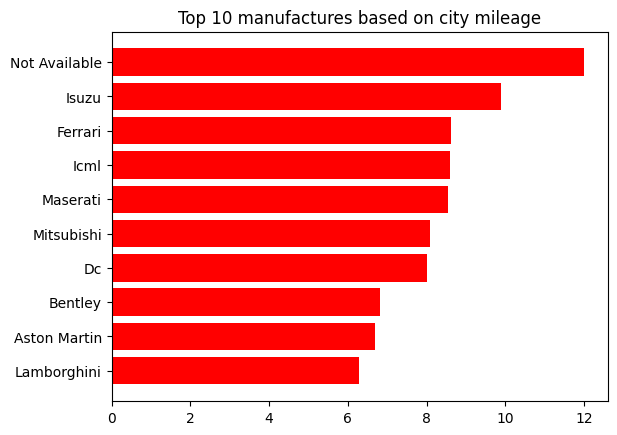

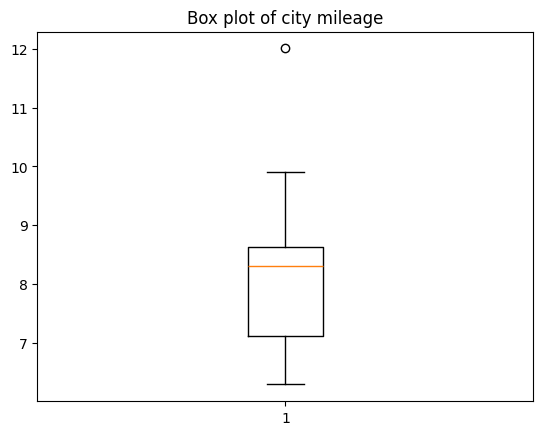

,Make,City_Mileage_km_litre
0,Lamborghini,6.293491
1,Aston Martin,6.700000
2,Bentley,6.819230
3,Dc,8.000000
4,Mitsubishi,8.080769
5,Maserati,8.538460
6,Icml,8.600000
7,Ferrari,8.630768
8,Isuzu,9.900000
9,Not Available,8.309614


In [88]:
# Task3:
import numpy as np
df = pd.DataFrame(data =fuel_Efficiency.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=True)[0:10],columns=['City_Mileage_km_litre'])
makes = df.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=True)[0:10].index
values = df.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=True)[0:10].values

plt.barh(makes,values,color = 'red')
plt.title('Top 10 manufactures based on city mileage')
plt.show() 
plt.boxplot(df['City_Mileage_km_litre']) #np.median(df['City_Mileage_km_litre'])
plt.title('Box plot of city mileage')
plt.show()
df=df.reset_index()
df.loc[df['Make']=='Not Available','City_Mileage_km_litre']=8.309614
df


# Interpretation
# df is created from fuel_efficiency top10 manufactures by city mileage
# by matplotlib we compared citymileage by visualizing in horizontal bargraph
# For checking outliers i have used boxplot and we foung one outlier from that plot anf then i replaced the outlier by median value and printed the dataframe df

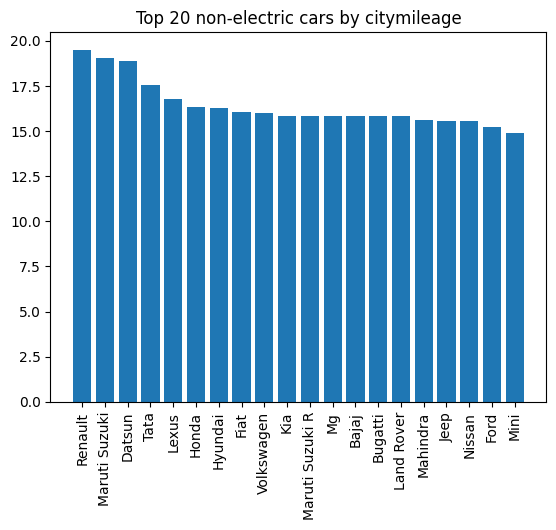

In [99]:
# Task4
df4 =cars.loc[cars['Fuel_Type']!='Electric']
fuelcars = pd.DataFrame(data =df4.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=False)[0:20],columns=['City_Mileage_km_litre'])
fuelcars=fuelcars.reset_index()
fuelcars
plt.bar(x = fuelcars['Make'],height = fuelcars['City_Mileage_km_litre'])
plt.title('Top 20 non-electric cars by citymileage')
plt.xticks(rotation=90)
plt.show()


# Interpretation
# The above are the top 20 non electric cars based on citymileage and represented by bar graph

In [6]:
# Task5

pvt1 = pd.pivot_table(cars,index=['Make'], values=['City_Mileage_km_litre'],aggfunc=['mean'])
pvt1= pvt1[(pvt1.index.get_level_values(0) == 'Hyundai') | (pvt1.index.get_level_values(0) == 'Mahindra') |(pvt1.index.get_level_values(0)=='Renault')|(pvt1.index.get_level_values(0)=='Skoda')]
pvt1 = pvt1.reset_index()
print(pvt1)
pvt2 = pd.pivot_table(cars, index=['Make'], values=['City_Mileage_km_litre'],aggfunc=['median'])
pvt2 = pvt2[(pvt2.index.get_level_values(0) == 'Hyundai') | (pvt2.index.get_level_values(0) == 'Mahindra') |(pvt2.index.get_level_values(0)=='Renault')|(pvt2.index.get_level_values(0)=='Skoda')]
pvt2 =pvt2.reset_index()
print(pvt2)
pvt3 = pd.pivot_table(cars, index=['Make'], values=['Highway_Mileage_km_litre'],aggfunc=['mean'])
pvt3 = pvt3[(pvt3.index.get_level_values(0) == 'Hyundai') | (pvt3.index.get_level_values(0) == 'Mahindra') |(pvt3.index.get_level_values(0)=='Renault')|(pvt3.index.get_level_values(0)=='Skoda')]
pvt3=pvt3.reset_index()
print(pvt3)
pvt4 = pd.pivot_table(cars, index=['Make'], values=['Highway_Mileage_km_litre'],aggfunc=['median'])
pvt4 = pvt4[(pvt4.index.get_level_values(0) == 'Hyundai') | (pvt4.index.get_level_values(0) == 'Mahindra') |(pvt4.index.get_level_values(0)=='Renault')|(pvt4.index.get_level_values(0)=='Skoda')]
pvt4=pvt4.reset_index()
print(pvt4)


# Interpretation
# The above are four pivottables of city and highway mileage of there mean ,median values .The below are the four pivot tables

       Make                  mean
            City_Mileage_km_litre
0   Hyundai             16.267567
1  Mahindra             19.088655
2   Renault             19.501196
3     Skoda             14.516278
       Make                median
            City_Mileage_km_litre
0   Hyundai             15.815381
1  Mahindra             15.815381
2   Renault             21.040000
3     Skoda             15.100000
       Make                     mean
            Highway_Mileage_km_litre
0   Hyundai                17.325799
1  Mahindra                17.483460
2   Renault                17.082279
3     Skoda                17.187148
       Make                   median
            Highway_Mileage_km_litre
0   Hyundai                16.879706
1  Mahindra                16.879706
2   Renault                16.879706
3     Skoda                16.879706


                          mean                median
         City_Mileage_km_litre City_Mileage_km_litre
Make                                                
Hyundai              16.267567             15.815381
Mahindra             19.088655             15.815381
Renault              19.501196             21.040000
Skoda                14.516278             15.100000


Text(0.5, 1.0, 'Mean median of manufacture by mileage')

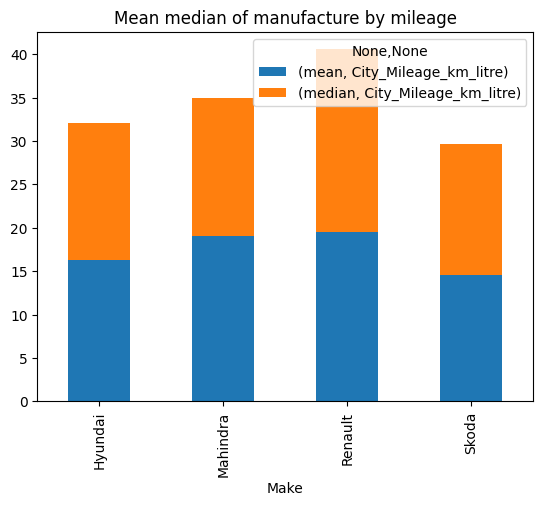

In [100]:
# Task6:
citycars = pd.pivot_table(cars,index=['Make'], values=['City_Mileage_km_litre'],aggfunc=['mean','median'])
citycars= citycars[(citycars.index.get_level_values(0) == 'Hyundai') | (citycars.index.get_level_values(0) == 'Mahindra') |(citycars.index.get_level_values(0)=='Renault')|(citycars.index.get_level_values(0)=='Skoda')]
print(citycars)
citycars.plot(kind = 'bar',stacked=True)
plt.title('Mean median of manufacture by mileage')

# Interpretation
# The mean and median of hyundai,mahindra,skoda,bmw based on city and highway mileages and the stacked bar graph is used for below visualization

<Figure size 1400x800 with 0 Axes>

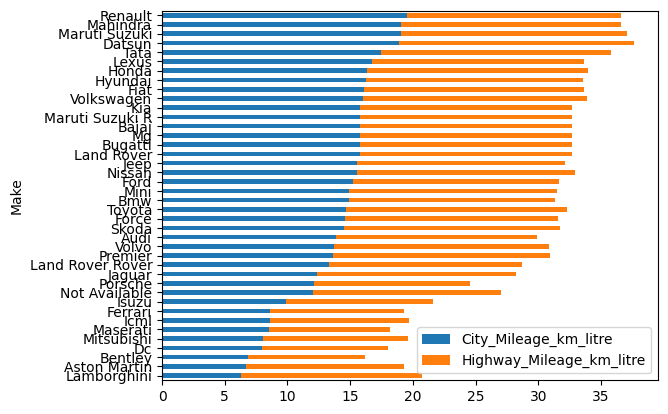

<Figure size 1400x800 with 0 Axes>

In [8]:
# Task7:
allcars = pd.pivot_table(cars, index=['Make'], values=['City_Mileage_km_litre','Highway_Mileage_km_litre'])
allcars = allcars.sort_values(by='City_Mileage_km_litre', ascending=True)  
allcars.plot(kind='barh',stacked=True)
plt.figure(figsize=(14,8))

# Interpretation
# The stacked horizontal bargraph represents average city mileage in ascending order with manufactures

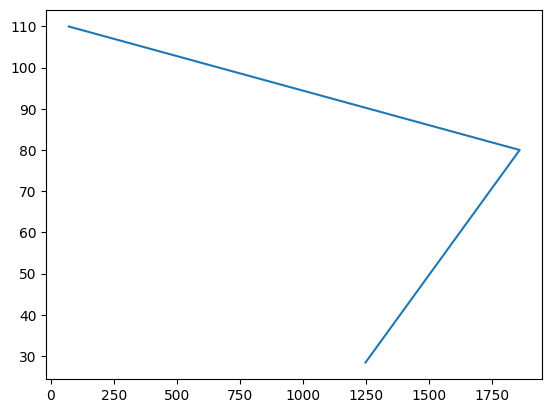

In [9]:
# Task8:
disp_cars = cars.loc[:,['Displacement','City_Mileage_km_litre']]
disp_cars =disp_cars.sort_values(by ='City_Mileage_km_litre',ascending =False)[:10]
x = disp_cars['Displacement']
y = disp_cars['City_Mileage_km_litre']
plt.plot(x,y)
plt.show()

# Interpretation
# The below visualized line chart of displacement and citymileage 
# The relation between displacement and citymileage is vice versa high in displacement has less mileage

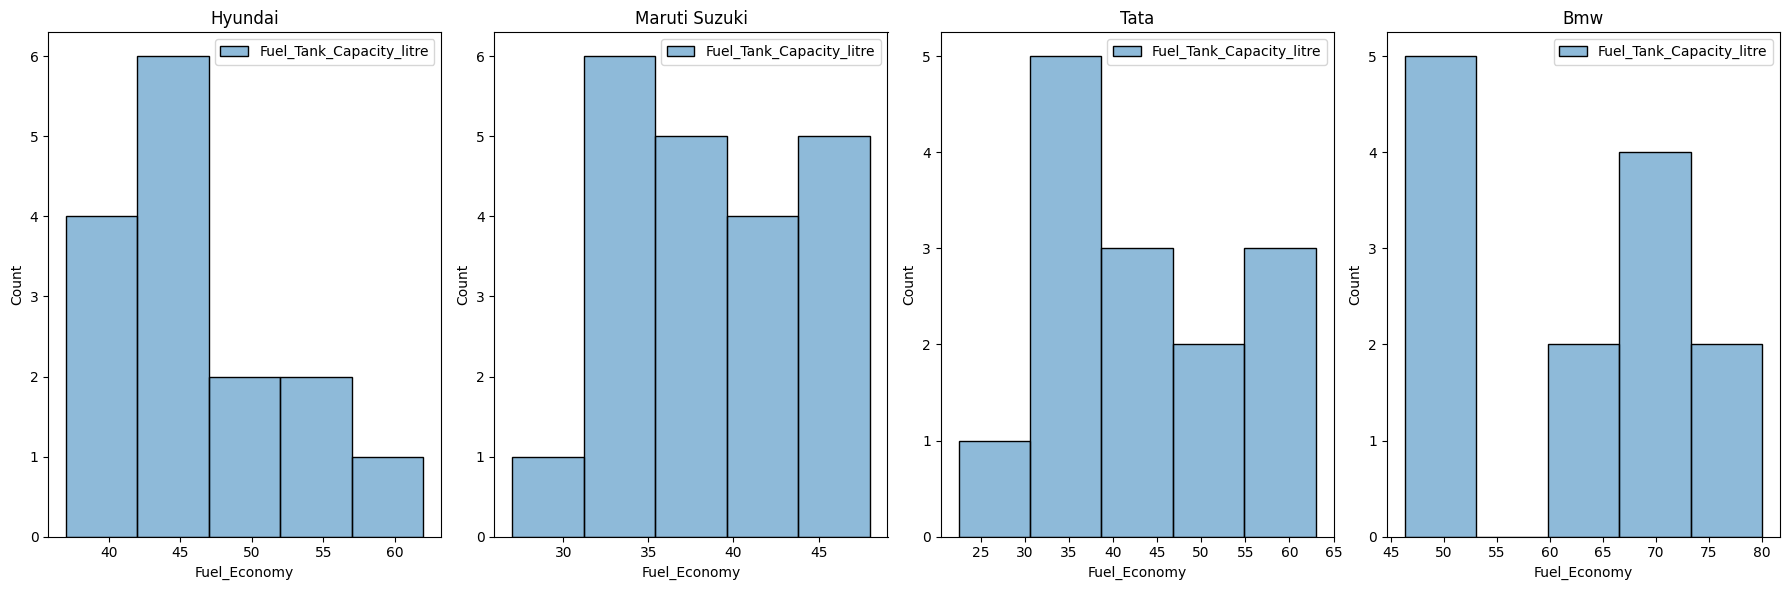

In [10]:
# Task9:
import seaborn as sns
economy_cars1 = pd.pivot_table(cars,index=['Make','Model'], values=['Fuel_Tank_Capacity_litre'])
economy_cars1 = economy_cars1[(economy_cars1.index.get_level_values(0) == 'Hyundai')]
economy_cars1

economy_cars2 = pd.pivot_table(cars,index=['Make','Model'], values=['Fuel_Tank_Capacity_litre'])
economy_cars2 = economy_cars2[(economy_cars2.index.get_level_values(0) == 'Maruti Suzuki')]
economy_cars2

economy_cars3 = pd.pivot_table(cars,index=['Make','Model'], values=['Fuel_Tank_Capacity_litre'])
economy_cars3 = economy_cars3[(economy_cars3.index.get_level_values(0) == 'Tata')]
economy_cars3

economy_cars4 = pd.pivot_table(cars,index=['Make','Model'], values=['Fuel_Tank_Capacity_litre'])
economy_cars4 = economy_cars4[(economy_cars4.index.get_level_values(0) == 'Bmw')]
economy_cars4
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
sns.histplot(economy_cars1, bins=5,ax = axes[0])
axes[0].set_title('Hyundai')
axes[0].set_xlabel('Fuel_Economy')
sns.histplot(economy_cars2, bins=5,ax = axes[1])
axes[1].set_title('Maruti Suzuki')
axes[1].set_xlabel('Fuel_Economy')
sns.histplot(economy_cars3, bins=5,ax = axes[2])
axes[2].set_title('Tata')
axes[2].set_xlabel('Fuel_Economy')
sns.histplot(economy_cars4, bins=5,ax = axes[3])
axes[3].set_title('Bmw')
axes[3].set_xlabel('Fuel_Economy')
plt.tight_layout()
plt.show()

# Interpretation
# I have used subplots and plotted four histograms using seaborn for all mamufactures mentioned in task 
# By plotting we can see bmw has more skewed than other distribution because the histogram is aside form a group of other fuel efficcienct 

In [11]:
# Task10:
car_specifications = cars.loc[:,['Valves_Per_Cylinder', 'Kerb_Weight', 'Make','Displacement', 'Model', 'Variant', 'Fuel_Type','Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre','Power', 'Torque','Gross_Vehicle_Weight']]
car_specifications.isnull()
car_specifications.info()

# Interpretation
# The above is dataframe created by data extraced from cars the data is:['Valves_Per_Cylinder', 'Kerb_Weight', 'Make','Displacement', 'Model', 'Variant', 'Fuel_Type','Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre','Power', 'Torque','Gross_Vehicle_Weight']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Valves_Per_Cylinder       1276 non-null   float64
 1   Kerb_Weight               911 non-null    object 
 2   Make                      1276 non-null   object 
 3   Displacement              1276 non-null   float64
 4   Model                     1276 non-null   object 
 5   Variant                   1276 non-null   object 
 6   Fuel_Type                 1276 non-null   object 
 7   Fuel_Tank_Capacity_litre  1276 non-null   float64
 8   City_Mileage_km_litre     1276 non-null   float64
 9   Highway_Mileage_km_litre  1276 non-null   float64
 10  Power                     1276 non-null   float64
 11  Torque                    1276 non-null   float64
 12  Gross_Vehicle_Weight      681 non-null    object 
dtypes: float64(7), object(6)
memory usage: 129.7+ KB


In [64]:
# Task11:
cars['Kerb_Weight'] = cars['Kerb_Weight'].str.replace(r" kg",'',regex=True)
cars['Kerb_Weight'] = cars['Kerb_Weight'].str.replace(r"-",'',regex=True)
cars = cars.astype({"Kerb_Weight": float})
cars['Kerb_Weight'] = cars['Kerb_Weight']*2.2
print(cars['Kerb_Weight'])
cars['Kerb_Weight'] = cars['Kerb_Weight'].fillna(cars['Kerb_Weight'].mode())

cars['Gross_Vehicle_Weight'] = cars['Gross_Vehicle_Weight'].str.replace(r" kg",'')
cars['Gross_Vehicle_Weight'] = cars['Gross_Vehicle_Weight'].str.replace(r"k1g1",'')
cars['Gross_Vehicle_Weight'] = cars['Gross_Vehicle_Weight'].str.replace(r"NA",'')
cars['Gross_Vehicle_Weight'] = cars['Gross_Vehicle_Weight'].str.replace(r"â€¯",'',regex=True)
cars['Gross_Vehicle_Weight'] = cars['Gross_Vehicle_Weight'].str.replace(r"",'1',regex=True)
cars = cars.astype({"Gross_Vehicle_Weight": float})
cars['Gross_Vehicle_Weight'] = cars['Gross_Vehicle_Weight']*2.2
cars['Gross_Vehicle_Weight'] = cars['Gross_Vehicle_Weight'].fillna(cars['Gross_Vehicle_Weight'].mode()) 
print(cars['Gross_Vehicle_Weight'])

# Interpretation
# The data type of two colums kerb weight and Gross vechile weight is change to float by replaceing the str present in data as kg etc
# Then they converted to pounds and again filled the missing values with mode because the data have so may missing values to fill with mean and median

0       1452.0
1       1595.0
2       1562.0
3       1595.0
4       1595.0
         ...  
1271    2574.0
1272    2585.0
1273    2435.4
1274    2376.0
1275    5137.0
Name: Kerb_Weight, Length: 1276, dtype: float64


Performance Comparison:

Mean                   Displacement  Cylinders  Valves_Per_Cylinder
Make                                                          
Aston Martin       5038.333333  10.666667             4.000000
Audi               2256.354839   5.161290             4.772765
Bajaj               216.000000   4.380992             1.000000
Bentley            5447.833333  10.666667             4.000000
Bmw                2707.918919   5.459459             4.000000
Bugatti            7993.000000  16.000000             4.000000
Datsun             1065.066667   3.000000             4.000000
Dc                 2000.000000   4.000000             4.000000
Ferrari            4589.500000   8.500000             3.997232
Fiat               1269.391304   4.000000             4.000000
Force              2447.000000   4.000000             4.000000
Ford               1551.325581   3.883721             3.998970
Honda              1444.875000   4.029765             3.999654
Hyundai            1354.467728   3.976561         

<function matplotlib.pyplot.show(close=None, block=None)>

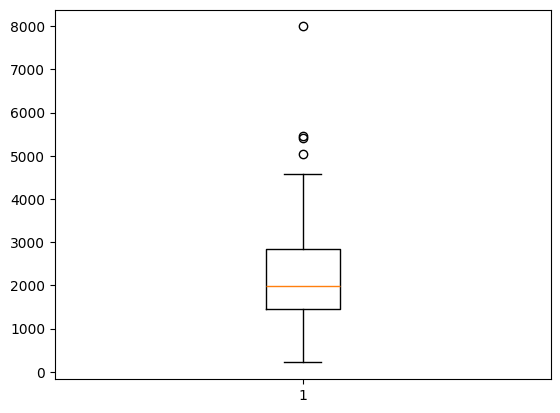

In [43]:
# Task12:
performance =cars.groupby('Make')[['Displacement', 'Cylinders','Valves_Per_Cylinder']]
mean = performance.mean()
median = performance.median()
std = performance.std()
cv = (performance.std()/performance.mean())*100
print('Mean',mean)
print('----------')
print('Median',median)
print('----------')
print('Standard_deviation',std)
print('----------')
print('Coefficient_of_varience',cv)
plt.boxplot(mean['Displacement'])
plt.show

# Interpretation
# The eacr manufactures displacemt ,cylinder and value per cylinders mean medain standard deviation adn cv is calculated to compare perfromance 
# and the box ploat of displacement is diaplyed below as asked in task problem statment

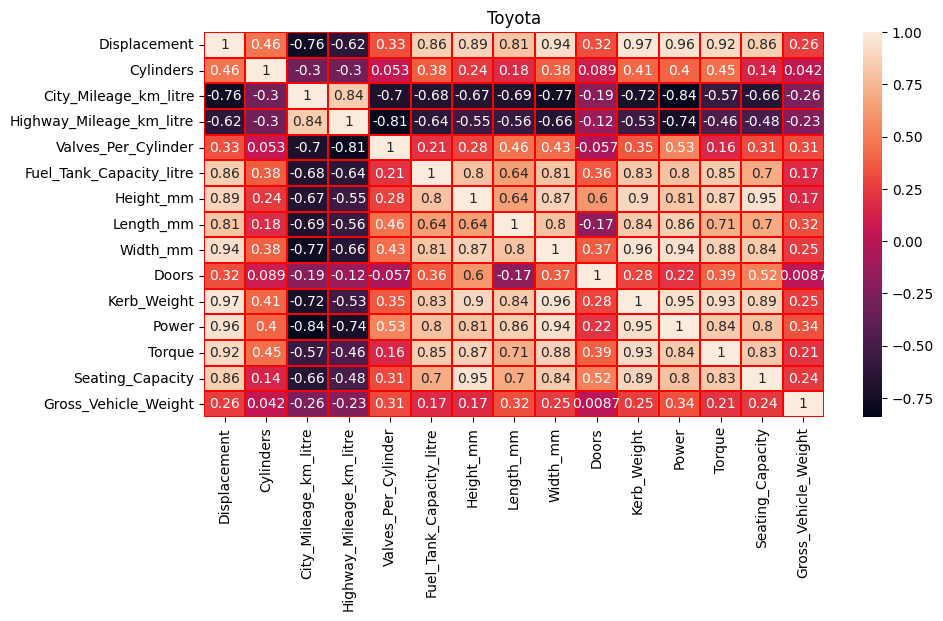

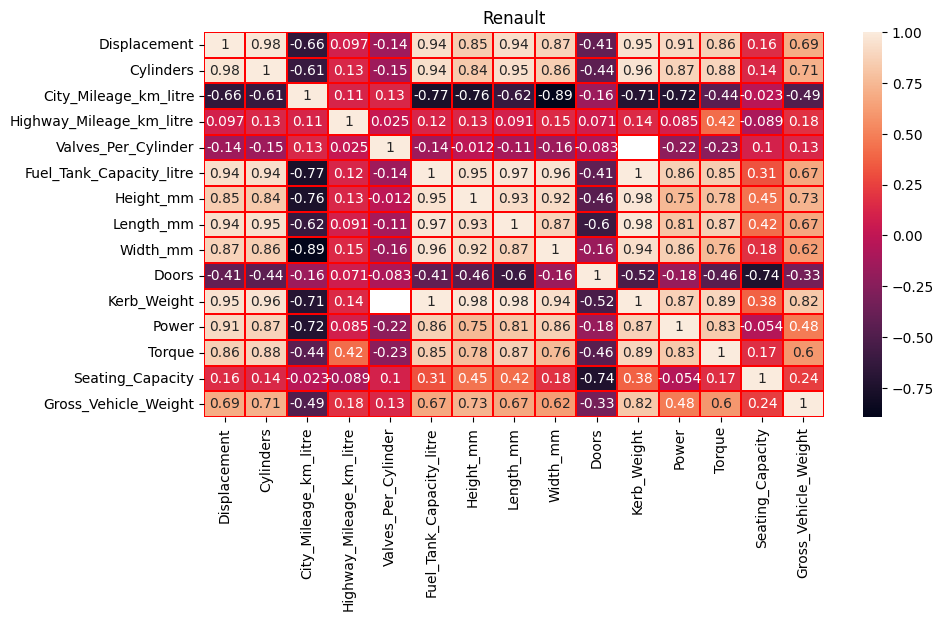

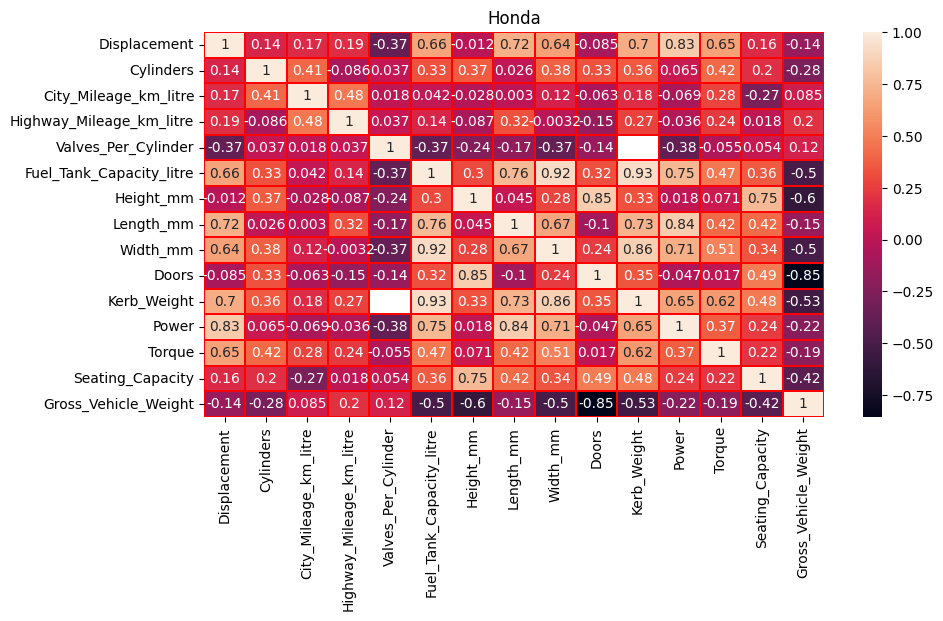

In [102]:
# Task13
plt.subplots(figsize=(10,5))
sns.heatmap(cars.loc[cars['Make'] =='Toyota',['Displacement','Cylinders','City_Mileage_km_litre', 'Highway_Mileage_km_litre','Valves_Per_Cylinder','Fuel_Tank_Capacity_litre','Height_mm','Length_mm','Width_mm','Doors','Kerb_Weight','Power','Torque','Seating_Capacity','Gross_Vehicle_Weight']].corr(),annot=True,linecolor='red',linewidths=.25)
plt.title('Toyota')
plt.show()
plt.subplots(figsize=(10,5))
sns.heatmap(cars.loc[cars['Make'] =='Renault',['Displacement','Cylinders','City_Mileage_km_litre', 'Highway_Mileage_km_litre','Valves_Per_Cylinder','Fuel_Tank_Capacity_litre','Height_mm','Length_mm','Width_mm','Doors','Kerb_Weight','Power','Torque','Seating_Capacity','Gross_Vehicle_Weight']].corr(),annot=True,linecolor='red',linewidths=.25)
plt.title('Renault')
plt.show()
plt.subplots(figsize=(10,5))
sns.heatmap(cars.loc[cars['Make'] =='Honda',['Displacement','Cylinders','City_Mileage_km_litre', 'Highway_Mileage_km_litre','Valves_Per_Cylinder','Fuel_Tank_Capacity_litre','Height_mm','Length_mm','Width_mm','Doors','Kerb_Weight','Power','Torque','Seating_Capacity','Gross_Vehicle_Weight']].corr(),annot=True,linecolor='red',linewidths=.25)
plt.title('Honda')
plt.show()


# Interpretation
# The below are heat maps of toyota,honda,renault to know correlation between other numeric columns with mileage
# From all heat maps the factors that affect both city and highway mileage are kerbweight,power,displacement etc..

Weight Distribution Study:

Mean                    Kerb_Weight  Gross_Vehicle_Weight
Make                                                
Aston Martin      3.813333e+03          3.425302e+18
Audi              3.982000e+03          5.286506e+18
Bajaj                      NaN          2.446645e+18
Bentley           5.407233e+03          5.385040e+18
Bmw               3.775305e+03          3.874695e+18
Bugatti           4.389000e+03          2.446645e+18
Datsun            1.900800e+03          2.446645e+18
Dc                3.476000e+03          5.377780e+18
Ferrari           3.594250e+03          2.446645e+18
Fiat              2.642095e+03          2.850055e+18
Force                      NaN          4.403962e+18
Ford              6.663831e+06          3.264636e+18
Honda             2.467477e+03          3.866413e+18
Hyundai           2.446494e+03          3.393627e+18
Icml              3.778800e+03          5.382619e+18
Isuzu             4.264333e+03          3.621034e+18
Jaguar            3.815958e+03          4

<Axes: xlabel='Make'>

<Figure size 2000x1000 with 0 Axes>

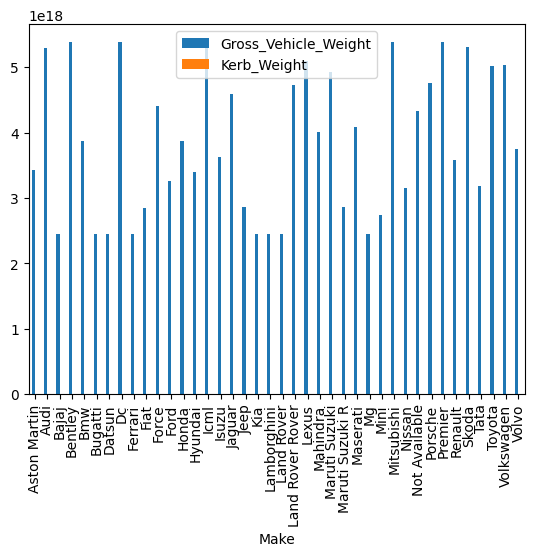

In [75]:
# Task14:
car1 = cars.groupby('Make')[['Kerb_Weight','Gross_Vehicle_Weight']]
mean = car1.mean()
median = car1.median()
std = car1.std()
cv = (car1.std()/car1.mean())*100
print('Mean',mean)
print('----------')
print('Median',median)
print('----------')
print('Standard_deviation',std)
print('----------')
print('Coefficient_of_varience',cv)
compare_cars = pd.pivot_table(cars, index=['Make'], values=['Kerb_Weight','Gross_Vehicle_Weight'])
plt.figure(figsize=(20,10))
compare_cars.plot(kind = 'bar',stacked=False)

# Interpretation
# The mean,medianStandard_deviation,Coefficient_of_varience of maunfactures is compared by kerbweight and gross vehicle weight and compared using bar graph